In [2]:
import math
import numpy as np

import matplotlib.pyplot as plot
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from figure import LineStyle, Marker, Hatch, Location, Align, FontWeight

"""
参考教程：
  - 11 种 Matplotlib 科研论文图表教程：https://www.python88.com/topic/138544
  - 官方教程：https://matplotlib.org/stable/gallery
  - 图形设置：https://blog.csdn.net/qq_40481843/article/details/106231257
"""
dpi_save = 500

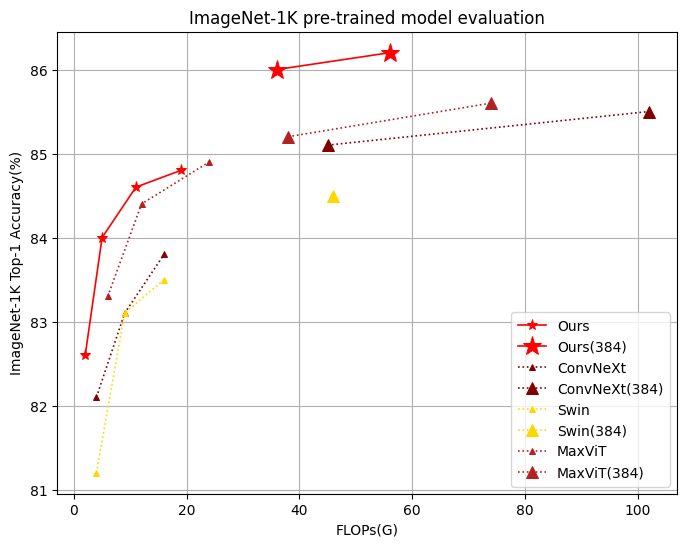

In [3]:

# Performance Comparison figure
# 参考论文：
#   - 《TransNeXt: Robust Foveal Visual Perception for Vision Transformers》
# plot 风格参考：https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plot.style.use('default')                                # 修改 plot 风格
fig: plot.Figure = plot.figure(figsize=(8, 6), dpi=100)  # 创建图形，包括所有维度、图像、文本和标签对象的容器
axes: plot.Axes = plot.axes()                            # 创建维度，包括图像、有边界的格子、刻度和标签、图表元素

# 数据点
data_points = {
    'Ours':
        {
            'points': np.array([[2, 82.6], [5, 84], [11, 84.6], [19, 84.8]]),
            'marker_style': "ours",
            'color': "red"
        },
    'Ours(384)': 
        {
            'points': np.array([[36, 86], [56, 86.2]]),
            'marker_style': "ours_l",
            'color': "red"
        },
    'ConvNeXt':
        {
            'points': np.array([[4, 82.1], [9, 83.1], [16, 83.8]]),
            'marker_style': "others",
            'color': "maroon"
        },
    'ConvNeXt(384)':
        {
            'points': np.array([[45, 85.1], [102, 85.5]]),
            'marker_style': "others_l",
            'color': "maroon"
        },
    'Swin':
        {
            'points': np.array([[4, 81.2], [9, 83.1], [16, 83.5]]),
            'marker_style': "others",
            'color': "gold"
        },
    'Swin(384)':
        {
            'points': np.array([[46, 84.5]]),
            'marker_style': "others_l",
            'color': "gold"
        },
    'MaxViT':
        {
            'points': np.array([[6, 83.3], [12, 84.4], [24, 84.9]]),
            'marker_style': "others",
            'color': "firebrick"
        },
    'MaxViT(384)':
        {
            'points': np.array([[38, 85.2], [74, 85.6]]),
            'marker_style': "others_l",
            'color': "firebrick"
        },
}

# 标记和线条参数
marker_dict = {
    'ours': 
        {
            'linestyle': LineStyle.SOLID.value,  # 线条类型
            'marker': Marker.STAR.value,         # 标记图形
            'markersize': 8, 
            'markeredgewidth': 0.7
        },  # 还有 'markeredgecolor', 'markerfacecolor' 等参数
    'ours_l': 
        {
            'linestyle': LineStyle.SOLID.value,
            'marker': Marker.STAR.value,
            'markersize': 14, 
            'markeredgewidth': 0.7
        },
    'others': 
        {
            'linestyle': LineStyle.DOTTED.value,
            'marker': Marker.TRIANGLE_UP.value, 
            'markersize': 5, 
            'markeredgewidth': 0.7
        },
    'others_l': 
        {
            'linestyle': LineStyle.DOTTED.value,
            'marker': Marker.TRIANGLE_UP.value,
            'markersize': 9, 
            'markeredgewidth': 0.7
        },
}
line_kwargs = {'linewidth': 1.2}

# 绘制折线图，参考：https://blog.csdn.net/qq_43874317/article/details/130778939
for label, value in data_points.items():
    points = value['points']
    marker_style = value['marker_style'] if value.__contains__('marker_style') else 'others'
    color = value['color'] if value.__contains__('color') else 'gray'
    marker_kwargs = marker_dict[marker_style]
    plot.plot(points[:, 0], points[:, 1],               # 数据点
              label=label,                              # 图例标签
              color=color,                              # 线条颜色
              **marker_kwargs, **line_kwargs)           # 标记和线条参数
    
# 显示图例，参考：https://blog.csdn.net/mighty13/article/details/113820798
plot.legend(loc=Location.LOWER_RIGHT.value,  # 图例位置
            frameon=True,  # 边框显示，默认为 False
            fancybox=True,  # 边框圆角，默认为 True
            borderpad=0.5,  # 边框距离，默认为 0.4
            )

# 设置图表信息
plot.title("ImageNet-1K pre-trained model evaluation")
plot.xlabel("FLOPs(G)")
plot.ylabel("ImageNet-1K Top-1 Accuracy(%)")

# 设置网格
plot.grid()

# 保存和展示图标
plot.savefig("./figures/Performance Comparison figure.png", dpi=dpi_save) # 保存图表
plot.show()

In [4]:
def draw_ticks(axes_in: plot.Axes, locator: ticker.Locator, header: str, x_label: str):
    """
    绘制比例尺刻度，放在图表当中
    """
    # 设置线框
    axes_in.spines[[Align.LEFT.value, Align.RIGHT.value, Align.TOP.value]].set_visible(False)  # 隐藏其他边框
    axes_in.spines[Align.BOTTOM.value].set_color("gray")                                       # 设置底部边框颜色
    axes_in.spines[Align.BOTTOM.value].set_linewidth(1.2)                                      # 设置底部边框宽度
    axes_in.set_facecolor((0, 0, 0, 0))                                                        # 设置背景为透明
    
    # 设置刻度线
    axes_in.tick_params(which="major", width=1.2, length=5, color="gray", direction="in")      # 设置刻度线参数
    axes_in.tick_params(which="minor", width=0.75, length=2.5, color="gray", direction="in")   # 设置子刻度线参数
    axes_in.yaxis.set_major_locator(plot.NullLocator())                                        # 隐藏 y 轴主刻度线
    axes_in.xaxis.set_major_locator(locator)                                                   # 设置 x 轴主刻度线
    axes_in.set_xlim(0, 350)
    axes_in.text(0, 0.2, header, transform=axes_in.transAxes, 
              ha=Align.CENTER.value, va=Align.BOTTOM.value, color="gray")
    axes_in.text(1.2, -0.125, x_label, transform=axes_in.transAxes, 
              ha=Align.LEFT.value, va=Align.TOP.value, color="gray")
    for label in axes_in.get_xticklabels():
        label.set_color("gray")
        
    return axes_in

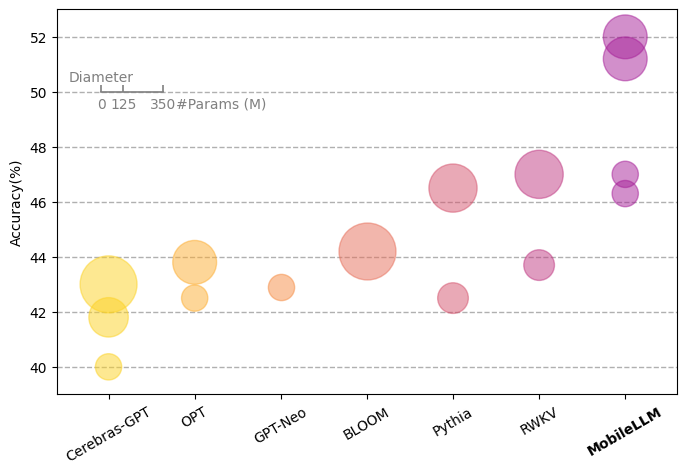

In [5]:

# Parameters Bubble figure
# 参考论文：
#   - 《MobileLLM: Optimizing Sub-billion Parameter Language Models  for On-Device Use Cases》
#   - 《A ConvNet for the 2020s》
plot.style.use('default')                                # 修改 plot 风格
fig: plot.Figure = plot.figure(figsize=(8, 5), dpi=100)  # 创建图形，包括所有维度、图像、文本和标签对象的容器
axes: plot.Axes = plot.axes()                            # 创建维度，包括图像、有边界的格子、刻度和标签、图表元素

# 数据点
parameter_scales = {
        'Cerebras-GPT': np.array([[40, 150], [41.8, 225], [43, 325]]),
        'OPT': np.array([[42.5, 150], [43.8, 250]]),
        'GPT-Neo': np.array([[42.9, 150]]),
        'BLOOM': np.array([[44.2, 325]]),
        'Pythia': np.array([[42.5, 175], [46.5, 275]]),
        'RWKV': np.array([[43.7, 175], [47, 275]]),
        'MobileLLM': np.array([[46.3, 150], [47, 150], [51.2, 250], [52, 250]])
}
num_params = len(parameter_scales)

# 自定义颜色映射，参考：https://blog.csdn.net/mr_cat123/article/details/78638491
color_offset = 3
cmap = plot.cm.get_cmap("plasma", num_params + (color_offset * 2 - 1))    # 自定义颜色映射

# 绘制气泡图
for (i, (key, scale)) in enumerate(parameter_scales.items()):
    x, y, s = np.ones_like(scale[:, 0]) * i, scale[:, 0], scale[:, 1]
    plot.scatter(x=x, y=y, s=(s ** 2) / (2 * math.pi * 10),
                 color=cmap(num_params - i + color_offset),
                 alpha=0.5, zorder=10,
                 label=key)

# 设置图表信息，限制图表显示范围
plot.ylabel("Accuracy(%)")
plot.xlim(0-0.6, 6+0.6)     # 限制 x 轴范围
plot.ylim(40-1, 52+1)       # 限制 y 轴范围
plot.xticks(ticks=np.arange(num_params), 
            labels=list(parameter_scales.keys()), 
            rotation=30)
# 设置标签字体粗体
labels = axes.get_xticklabels()
labels[-1].set_fontweight(FontWeight.BOLD.value)

# 设置网格
plot.grid(axis="x", linestyle=LineStyle.EMPTY.value)
plot.grid(axis="y", linestyle=LineStyle.DASHED.value, linewidth=1)

# 绘制内嵌刻度比例尺，要在绘制完主要的图表后再绘制
axes_in: plot.Axes = inset_axes(axes, width="10%", height="10%", loc=Location.UPPER_LEFT.value, borderpad=3.2)  # 这个 10% 不能动
draw_ticks(axes_in, ticker.FixedLocator([0, 125, 350]), "Diameter", "#Params (M)")

# 保存和展示图标
# plot.savefig("./figures/Parameters Bubble figure.png", dpi=dpi_save) # 保存图表
plot.show()

In [6]:
def hide_axes(axes: plot.Axes):
    """
    隐藏 axes 的所有内容
    """
    axes.spines[[
        Align.LEFT.value, 
        Align.RIGHT.value, 
        Align.TOP.value, 
        Align.BOTTOM.value]].set_visible(False)      # 隐藏所有边框
    axes.set_facecolor((0, 0, 0, 0))                 # 设置背景为透明
    axes.xaxis.set_major_locator(plot.NullLocator()) # 隐藏 x 轴主刻度线
    axes.yaxis.set_major_locator(plot.NullLocator()) # 隐藏 y 轴主刻度线

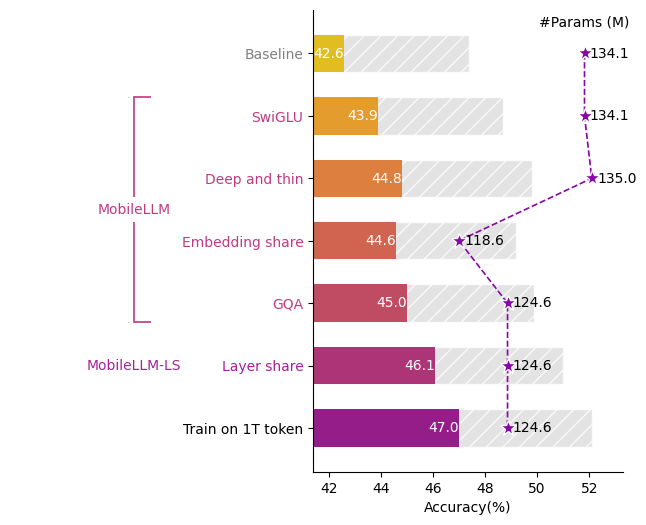

In [9]:

# Design Roadmap figure (Saining Plot/Overall Trajectory Plot)
# 参考论文：《MobileLLM: Optimizing Sub-billion Parameter Language Models  for On-Device Use Cases》
plot.style.use('default')                                # 修改 plot 风格
fig: plot.Figure = plot.figure(figsize=(8, 6), dpi=100)  # 创建图形，包括所有维度、图像、文本和标签对象的容器
axes_out: plot.Axes = plot.axes()                        # 创建外层维度，包括图像、有边界的格子、刻度和标签、图表元素
hide_axes(axes_out)                                      # 隐藏外层 axes
axes: plot.Axes = inset_axes(axes_out,                   # 创建内层 axes
                             width="50%", height="100%", 
                             loc=Location.RIGHT.value)

# 数据点
roadmap = {
        'Baseline':
            {
                'foreground': 42.6,
                'background': 47.4,
                'params(M)': 134.1,
            },
        'SwiGLU':
            {
                'foreground': 43.9,
                'background': 48.7,
                'params(M)': 134.1,
                'group': "MobileLLM",
            },
        'Deep and thin': 
            {
                'foreground': 44.8,
                'background': 49.8,
                'params(M)': 135.0,
                'group': "MobileLLM",
            },
        'Embedding share':
            {
                'foreground': 44.6,
                'background': 49.2,
                'params(M)': 118.6,
                'group': "MobileLLM",
            },
        'GQA': 
            {
                'foreground': 45.0,
                'background': 49.9,
                'params(M)': 124.6,
                'group': "MobileLLM",
            },
        'Layer share': 
            {
                'foreground': 46.1,
                'background': 51.0,
                'params(M)': 124.6,
                'group': "MobileLLM-LS",
            },
        'Train on 1T token': 
            {
                'foreground': 47.0,
                'background': 52.1,
                'params(M)': 124.6,
            },
}
num_params = len(parameter_scales)
minmax = {
    'min_foreground': min([value['foreground'] for value in list(roadmap.values())]),
    'max_foreground': max([value['foreground'] for value in list(roadmap.values())]),
    'min_background': min([value['background'] for value in list(roadmap.values())]),
    'max_background': max([value['background'] for value in list(roadmap.values())]),
    'min_params(M)': min([value['params(M)'] for value in list(roadmap.values())]),
    'max_params(M)': max([value['params(M)'] for value in list(roadmap.values())]),
}

# 标记和线条参数
marker_kwargs = {
    'linestyle': LineStyle.DASHED.value,  # 线条类型
    'marker': Marker.STAR.value,         # 标记图形
    'markersize': 12, 
    'markeredgewidth': 1,
    'markeredgecolor': "white",
}   # 还有 'markeredgecolor', 'markerfacecolor' 等参数
line_kwargs = {'linewidth': 1.2}

# 自定义颜色映射，参考：https://blog.csdn.net/mr_cat123/article/details/78638491
color_offset = 3
cmap = plot.cm.get_cmap("plasma", num_params + (color_offset * 2 - 1))    # 自定义颜色映射

# 绘制水平柱状图
height_ratio = 0.6
for (i, (key, value)) in enumerate(roadmap.items()):
    y = num_params - i - 1
    width_foreground = value['foreground']
    width_background = value['background']
    color_foreground = np.multiply(np.array(cmap(num_params - i + color_offset)), 0.9)
    plot.barh(y=y, width=width_background, height=height_ratio,      # 绘制背景
              color="gainsboro",
              alpha=0.8, zorder=-10,
              hatch='//', edgecolor="white")
    plot.barh(y=y, width=width_foreground, height=height_ratio,      # 绘制前景
              color=color_foreground,
              alpha=1, zorder=0)
    plot.text(x=width_foreground, y=y, s=f"{width_foreground:.1f}",  # 显示参数值
              ha=Align.RIGHT.value, va=Align.CENTER.value, color="white")

# 绘制散点图，散点图的显示区间在 max_foreground 和 max_background 之间
params = [param['params(M)'] for param in list(roadmap.values())]
params_x = [
    (param - minmax['min_params(M)']) / (minmax['max_params(M)'] - minmax['min_params(M)']) * (minmax['max_background'] - minmax['max_foreground']) + minmax['max_foreground']
    for param in params]
params_y = list(reversed(np.arange(num_params)))
plot.text(x = params_x[0], y = params_y[0] + 0.5, s = "#Params (M)",
          ha = Align.CENTER.value, va = Align.CENTER.value,  color = "black")
plot.plot(params_x, params_y,
          color=cmap(color_offset),
          **marker_kwargs, **line_kwargs)
for (i, (x, y)) in enumerate(zip(params_x, params_y)):               # 显示参数值
    plot.text(x=x + 0.2, y=y, s=f"{params[i]:.1f}", 
              ha=Align.LEFT.value, va=Align.CENTER.value, color="black")

# 设置图表信息，限制图表显示范围
plot.xlabel("Accuracy(%)")
plot.xlim(min(minmax['min_foreground'], minmax['min_background']) - 1.2, 
          max(minmax['max_foreground'], minmax['max_background']) + 1.2)
plot.ylim(-(1 - height_ratio / 2), num_params - height_ratio / 2), 
plot.yticks(ticks=np.arange(num_params), 
            labels=reversed(list(roadmap.keys())))

# 设置边框
axes.spines[Align.RIGHT.value].set_visible(False)
axes.spines[Align.TOP.value].set_visible(False)

# 设置标签字体颜色
labels = axes.get_yticklabels()
label_groups = {}
for (i, (label, (key, value))) in enumerate(zip(labels, reversed(list(roadmap.items())))):
    if key.lower() in ["baseline"]:       # 基准数据，标记为灰色
        label.set_color("gray")
        continue
        
    if value.__contains__('group'):       # 成组数据，集合同一个组的数据，颜色标记为组内第一个数据的颜色
        y = i
        group = value['group']
        if not label_groups.__contains__(group):
            label_groups[group] = []
        label_groups[group].append({'y': y, 'label': label, 'key': key})    # 集合同一个组的数据
        label.set_color(cmap(label_groups[group][0]['y'] + color_offset))   # 颜色标记为组内第一个数据的颜色
    else:                                 # 单独数据，标记为黑色
        label.set_color("black")
        
# 创建标签组 axes_label_group
height_total = num_params + 1 - height_ratio
for key, group in label_groups.items():
    x, y = 0.2, (group[0]['y'] + (1 - height_ratio)) / height_total
    w, h = 0.2, (len(group) - (1 - height_ratio)) / height_total
    color = cmap(group[0]['y'] + color_offset)
    line_width = 1.2
    box = dict(facecolor="white", edgecolor="white", linewidth=0, alpha=1)   # 文本纯白背景
    
    axes_label_group: plot.Axes = axes_out.inset_axes([x, y, w, h])
    hide_axes(axes_label_group)
    if len(group) > 1:  
        axes_label_group.spines[Align.LEFT.value].set_visible(True)          # 显示左边框
        axes_label_group.spines[Align.LEFT.value].set_color(color)           # 设置左边框颜色
        axes_label_group.spines[Align.LEFT.value].set_linewidth(line_width)  # 设置左边框宽度
        axes_label_group.yaxis.set_major_locator(plot.FixedLocator([0, 1]))  # 设置 y 轴主刻度线
        axes_label_group.set_ylim(0, 1)                                      # 设置 y 轴范围，和 y 轴刻度线数量一致就可以了
        axes_label_group.tick_params(axis="y", which="major",                # y 轴刻度线参数设置
                                     labelsize=0, width=line_width, length=12,
                                     direction="in", color=color)
        axes_label_group.text(0, 0.5, key,
                              ha=Align.CENTER.value, va=Align.CENTER.value, 
                              color=color, bbox=box)
    else:
        axes_label_group.text(0, 0.5, key,
                              ha=Align.CENTER.value, va=Align.CENTER.value, 
                              color=color, bbox=box)

# 保存和展示图标
plot.savefig("./figures/Design Roadmap figure.png", dpi=dpi_save) # 保存图表
plot.show()